<a href="https://colab.research.google.com/github/Magguire/Magguire/blob/main/module_2_core_week_III_ip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HYPOTHYROID PREDICTION

<b>Overview</b> 

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

## 1. Defining the Question

While performing your regression analysis, you will be required to perform modeling using the given regression techniques then evaluate their performance. You will be then required to provide your observations and recommendation on the suitability of each of the tested models on their appropriateness of solving the given problem. 

1. Multiple Linear Regression
2. Quantile Regression
3. Ridge Regression
4. Lasso Regression
5. Elastic Net Regression

### a) Specifying the Question

We need to perform regression analysis on a dataset in order to find factors that affect house prices and later predict houe prices.

### b) Defining the Metric for Success

The metric for success is to find the best regression model for prediciting King County house prices depending on the model with the lowest rmse value.

### c) Understanding the context 

 We need to find out which of the factors in the dataset affect house prices hence predict house prices based on these factors.

### d) Recording the Experimental Design

1. Import necessary libraries
2. Read and explore the given dataset.
3. Define the appropriateness of the available data to answer the given question.
4. Find and deal with outliers, anomalies, and missing data within the dataset.
5. Perform univariate, bivariate and multivariate analysis recording your observations.
6. Performing regression analysis:

  i.) Perform feature engineering: Incorporate categorical independent variables into your models.

  ii.) Check for multicollinearity

  iii.) Create residual plots for your models, and assess heteroskedasticity using Barlett's test.
  
7. Provide a recommendation based on your analysis.    
8. Challenge your solution by providing insights on how you can make improvements in model improvement.
9. Conclusion  

### e) Data Relevance

The dataset contains the attributes of several individual houses in the county.

## 2. Reading the Data

In [1]:
# Loading the Dataset
# url = http://bit.ly/hypothyroid_data

import pandas as pd
import numpy as np

df = pd.read_csv('http://bit.ly/hypothyroid_data')

## 3. Checking the Data

In [2]:
# Determining the no. of records in our dataset
# 
df.shape

(3163, 26)

The dataset contains 3163 records of houses and 26 columns.

In [3]:
# Previewing the top of our dataset
#
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


In [4]:
# Previewing the bottom of our dataset
# 
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,...,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,...,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,...,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,...,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,...,y,1.80,y,139,y,0.97,y,143,n,?


In [5]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

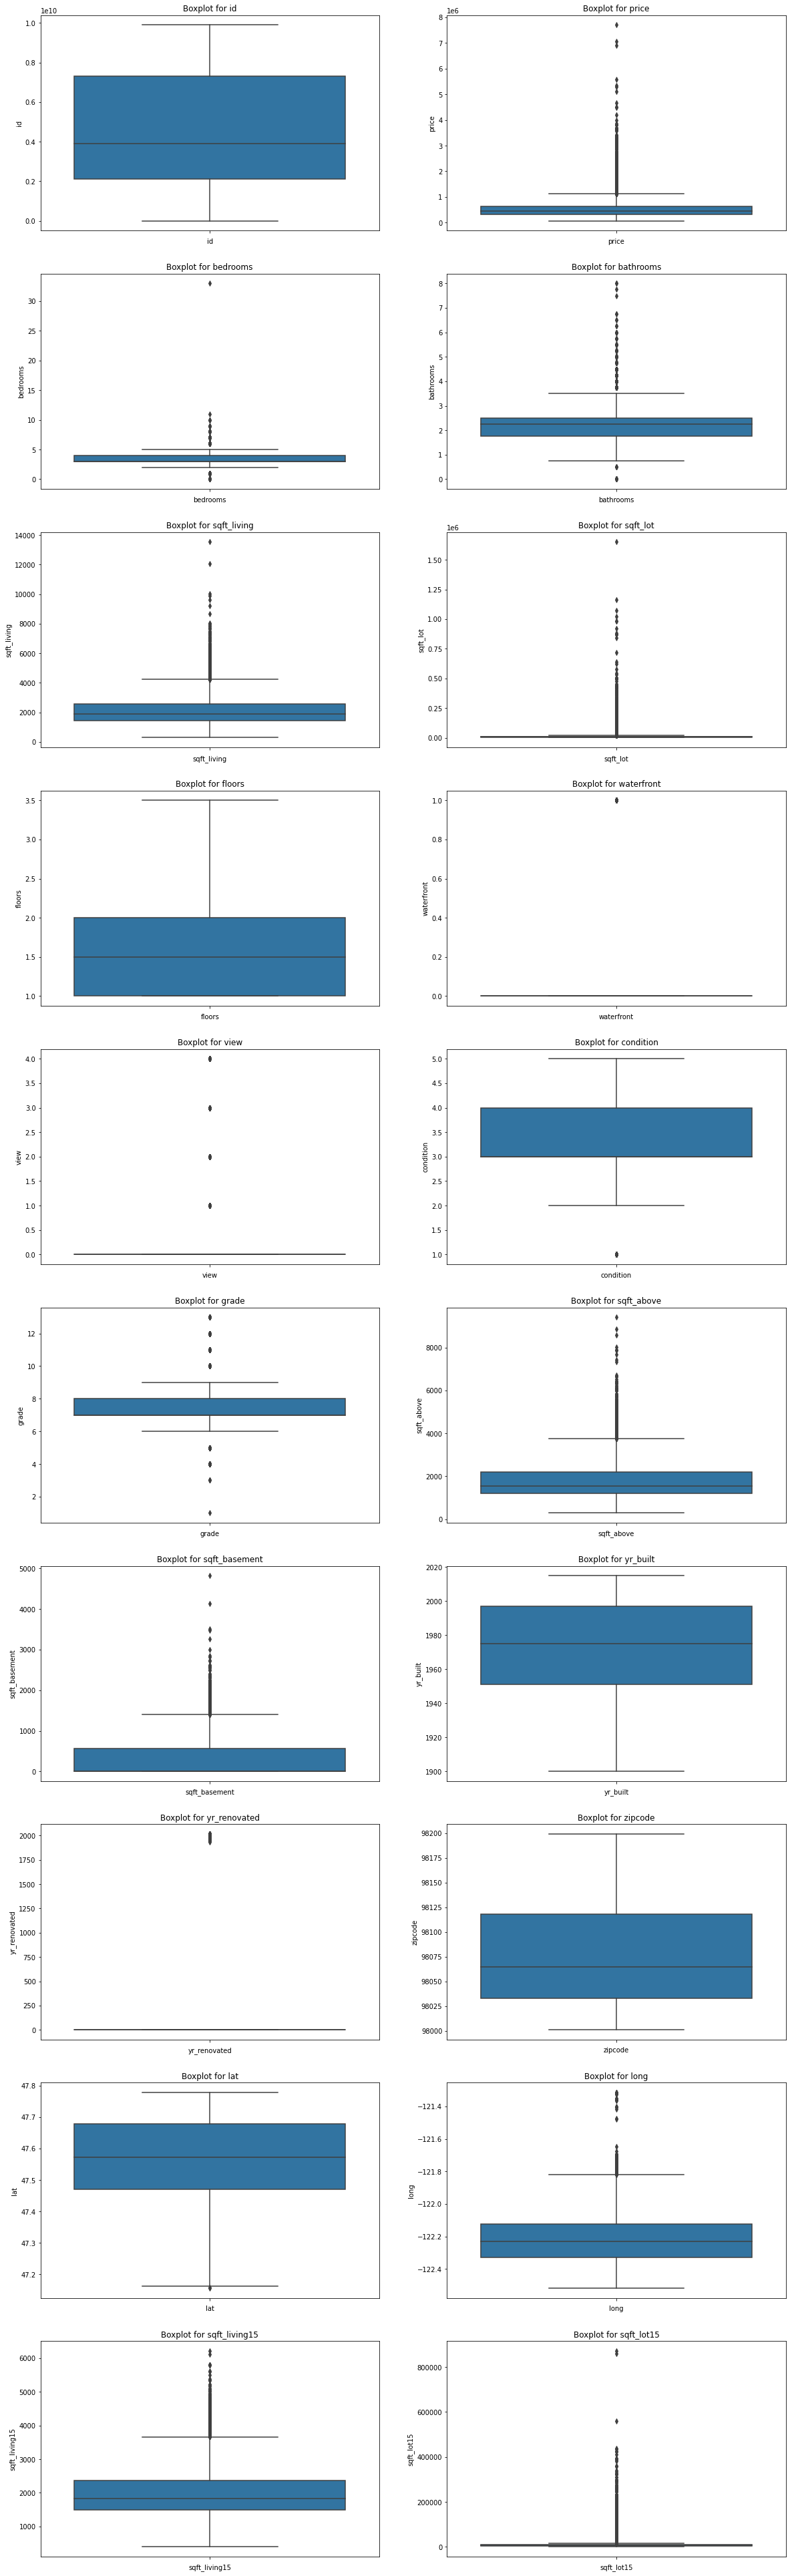

In [ ]:
# Checking for Outliers
#
import matplotlib.pyplot as plt
import seaborn as sns

columns = [column for column in df.columns]
fig, ax = plt.subplots(ncols = 2, nrows = 10, figsize=(20,70))
ax = ax.ravel()

for column, ax in zip(columns, ax):
    sns.boxplot(y = df[column], ax=ax)
    ax.set_title('Boxplot for {}'.format(column))
    ax.set_xlabel(column)

plt.show()

From the outliers visuals, we can see that almost all columns have outliers. Let's investigate for actual outliers in context with the data and drop these.

In [ ]:
# Checking for Anomalies
#
# check interquatile range
def interquatile_range(column):
  q1 = df[column].quantile(.25)
  q3 = df[column].quantile(.75)
  intqr = q3 - q1
  return print({column: [q1,q3,intqr]})

for column in columns:
  interquatile_range(column)

{'id': [2123049194.0, 7308900445.0, 5185851251.0]}
{'price': [321950.0, 645000.0, 323050.0]}
{'bedrooms': [3.0, 4.0, 1.0]}
{'bathrooms': [1.75, 2.5, 0.75]}
{'sqft_living': [1427.0, 2550.0, 1123.0]}
{'sqft_lot': [5040.0, 10688.0, 5648.0]}
{'floors': [1.0, 2.0, 1.0]}
{'waterfront': [0.0, 0.0, 0.0]}
{'view': [0.0, 0.0, 0.0]}
{'condition': [3.0, 4.0, 1.0]}
{'grade': [7.0, 8.0, 1.0]}
{'sqft_above': [1190.0, 2210.0, 1020.0]}
{'sqft_basement': [0.0, 560.0, 560.0]}
{'yr_built': [1951.0, 1997.0, 46.0]}
{'yr_renovated': [0.0, 0.0, 0.0]}
{'zipcode': [98033.0, 98118.0, 85.0]}
{'lat': [47.471, 47.678, 0.20700000000000074]}
{'long': [-122.328, -122.125, 0.20300000000000296]}
{'sqft_living15': [1490.0, 2360.0, 870.0]}
{'sqft_lot15': [5100.0, 10083.0, 4983.0]}


In [ ]:
# Identifying the Missing Data
#
df.isnull().sum()

# There are no missing values in our dataset.

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no missing values in our dataset. 

Other anomalies that need explanation include:

* 0 in yr_renovated - implies house was not renovated

* 0 bathrooms or bedrooms could imply that the house is a single room and could probably be best fit for single room accommodation or commercial use.

In [ ]:
# More data cleaning procedures
#
# check for duplicates
df.duplicated().sum()


3

In [ ]:
# drop duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
# reset indexing in our dataset after dropping rows
# df.reset_index(inplace=True)
# df.set_index('index', inplace=True)
# df.head()

In [ ]:
# check uniformity in columns
df.columns

# columns are uniform

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

## 6. Exploratory Analysis

In [ ]:
# Ploting the univariate summaries and recording our observations
#
df.describe(include='all', datetime_is_numeric=True)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161000e+04,2.161000e+04,21610.000000,21610.000000,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000
mean,4.580161e+09,5.401789e+05,3.370847,2.114739,2079.881212,1.510829e+04,1.494239,0.007543,0.234197,3.409440,7.656779,1788.347894,291.533318,1971.003609,84.322351,98077.945673,47.560049,-122.213910,1986.518695,12769.031976
std,2.876547e+09,3.673876e+05,0.930110,0.770204,918.500299,4.142323e+04,0.539994,0.086523,0.766136,0.650764,1.175500,828.138723,442.596699,29.372639,401.499264,53.505373,0.138572,0.140833,685.425781,27305.972464
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.216125e+05,3.000000,1.750000,1425.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470925,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068875e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
# barplot function for value counts
def barplot(column):
  df[column].value_counts().plot.bar(figsize=(10,4))
  plt.title('Barplot for {}'.format(column))
  plt.xlabel(column)
  plt.ylabel('Count')
  return plt.show()

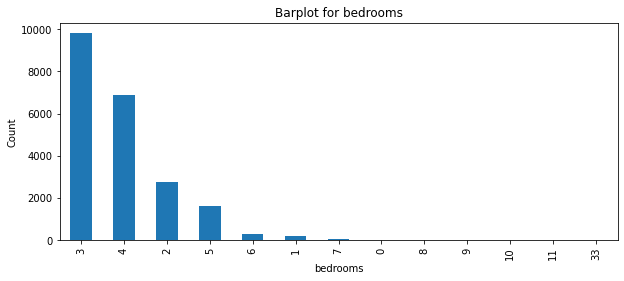

In [ ]:
# tournament representation
barplot('bedrooms')

Most houses have 3 bedrooms. The maximum number of bedrooms a house has in our dataset is 33. This looks queer though maybe posible basing on the price.

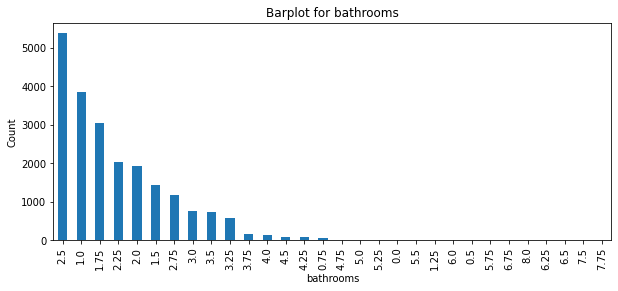

In [ ]:
# year representation
barplot('bathrooms')

Most houses have 2 bathrooms. Most number of bathrooms a house can have in our dataset is 8 and the least is 0.

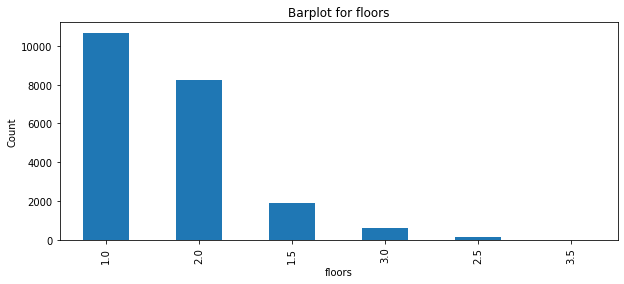

In [ ]:
# country representation
barplot('floors')

Most houses have only one floor. A number of houses still have the most number of floors in our dataset which is 3. 

In [ ]:
# pie chart
def pie_chart(column, explode):
  col = df.groupby(column, as_index=False)['id'].count()
  labels = col[column]
  values = col['id']
  plt.figure(figsize = (12,6))
  plt.pie(values, labels=labels, autopct = '%1.1f%%', explode = explode, shadow=True, startangle=20)
  plt.axis('equal')
  plt.title('Pie chart for {}'.format(column))
  return plt.show()

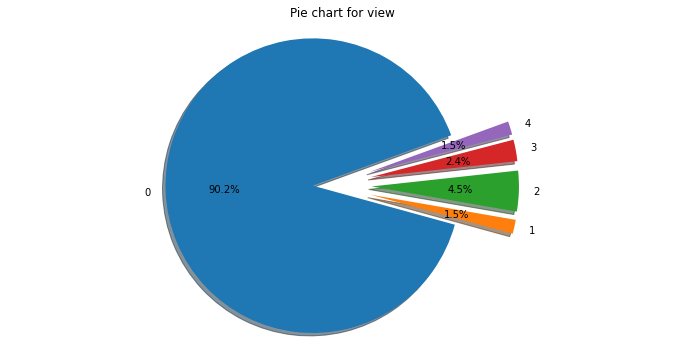

In [ ]:
pie_chart('view', (0.1,0.3,0.3,0.3,0.3))

 90.2% of the houses have no views.

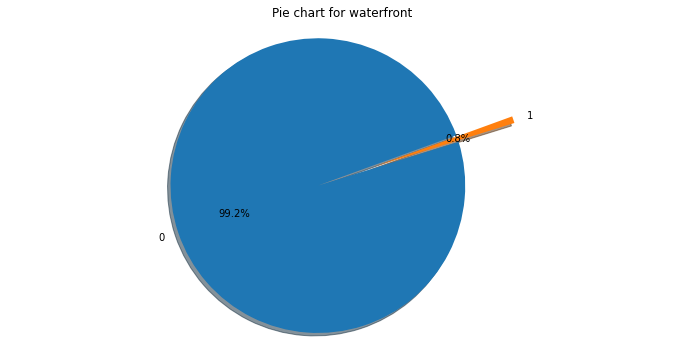

In [ ]:
pie_chart('waterfront', (0.1,0.3))

Only 0.8% of the houses have a waterfront.

In [ ]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


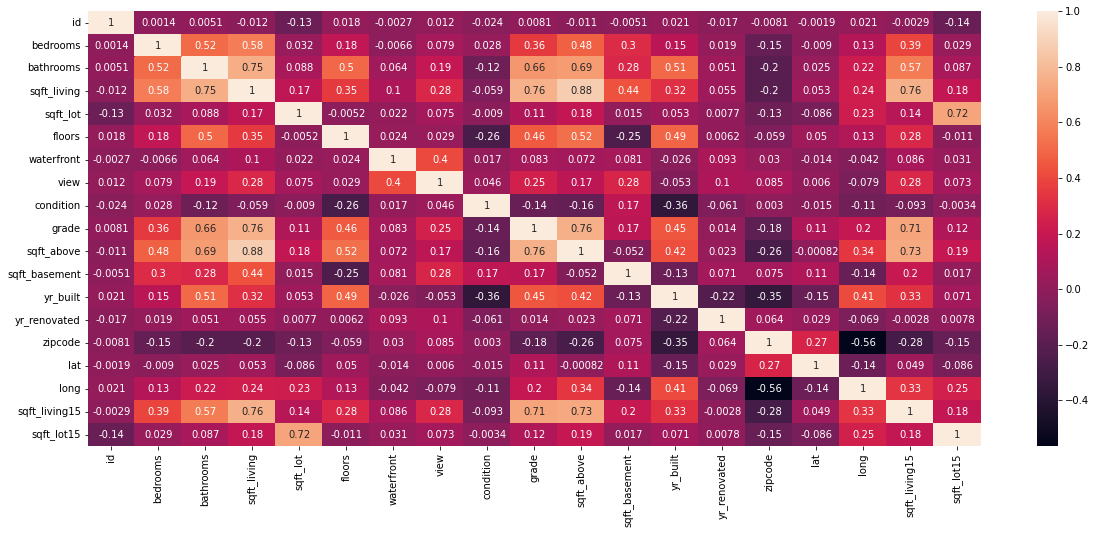

In [ ]:
# Bivariate analysis

# drop irrelevant columns
# df.drop(['id', 'zipcode'], axis=1, inplace=True)

# let's check for correlation between independent variables
X = df.drop('price', axis=1)
y = df['price']


plt.figure(figsize=(20,8))
correlations = X.corr()
sns.heatmap(correlations, annot=True)

Several variables are strongly positively correlated hence the need for regularization.
* 'sqft_living' and 'sqft_above'
* 'sqft_living' and 'bathrooms'
* 'sqft_above' and 'grade'
* 'grade' and 'bathrooms'
* 'grade' and 'sqft_living'
* 'sqft_living' and 'sqft_living15'
* 'bedrooms' and 'bathrooms'

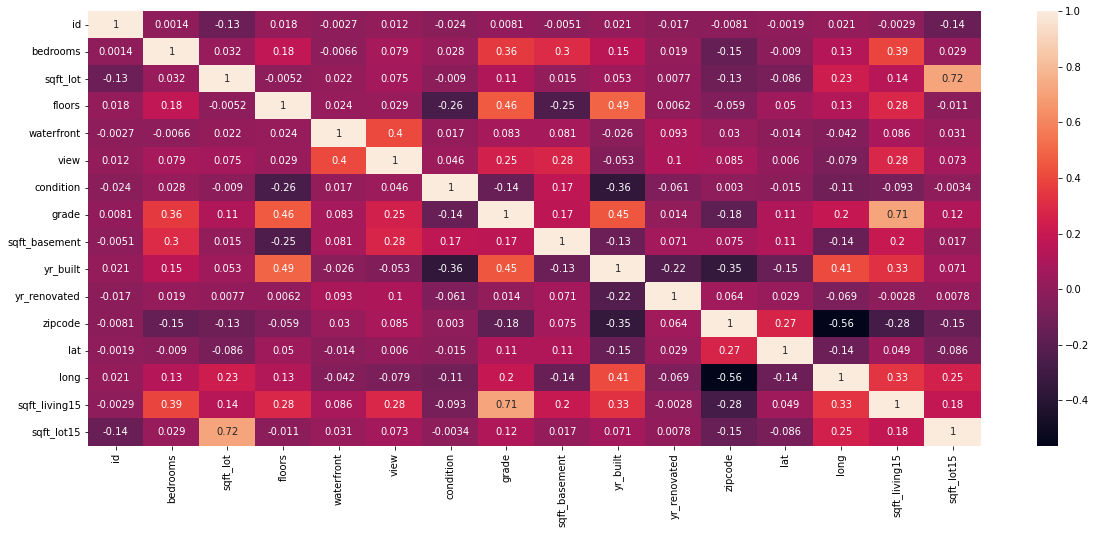

In [ ]:
# drop highly correlated variables

plt.figure(figsize=(20,8))
X.drop(['sqft_above', 'sqft_living', 'bathrooms'], axis=1, inplace=True)
sns.heatmap(X.corr(), annot=True)

In [ ]:
# Multivariate analysis
# We shall Linear discrimant analysis to perform dimensionality reduction by determining
# the variables that are most important in predicting sale prices.

# split data into X and y
X = X
y = y


In [ ]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)


In [ ]:
# Standardize predictors
from sklearn.preprocessing import StandardScaler

# create standard scaler object
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# perform LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=4)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
len(X.columns)

16

In [ ]:
explained_variance = lda.explained_variance_ratio_
explained_variance

array([0.50413987, 0.06657441, 0.04569075, 0.03998153])

In [ ]:
# train data with random forest regressor

from sklearn.ensemble import RandomForestRegressor
 
# create regressor object
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

# predict
y_pred = regressor.predict(X_test)

In [ ]:
# evaluate results

from sklearn.metrics import r2_score


print(r2_score(y_test,y_pred))


0.7428497745901481


## 7. Implementing the Solution

## i.) Multiple Linear Regression

In [ ]:
# split into dependent and independent variables

X = X
y = y

# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
# fit linear regression line
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# predict X
y1_pred = linreg.predict(X_train)
y2_pred = linreg.predict(X_test)

# evaluate results
from sklearn.metrics import mean_squared_error

print('rmse:',np.sqrt(mean_squared_error(y_train, y1_pred)), 'r2_score:', r2_score(y_train, y1_pred))
print('rmse:', np.sqrt(mean_squared_error(y_test, y2_pred)), 'r2_score:', r2_score(y_test, y2_pred))

rmse: 217514.52852183062 r2_score: 0.6517315911378643
rmse: 211033.35922191665 r2_score: 0.6611245247425976


In [ ]:
# coefficients
linreg.coef_

array([-1.45748161e-06,  7.98087387e+03,  3.21168181e-01,  6.95982313e+04,
        6.92299720e+05,  5.26526086e+04,  2.79277700e+04,  1.50322914e+05,
        9.88646036e+01, -2.49043026e+03,  3.56852106e+01, -5.44207688e+02,
        5.61308828e+05, -1.36983555e+05,  1.02595963e+02, -2.02028097e-01])

              price
count  4.322000e+03
mean   2.640540e+03
std    2.110413e+05
min   -1.222741e+06
25%   -1.010887e+05
50%   -1.390858e+04
75%    8.056051e+04
max    2.620780e+06


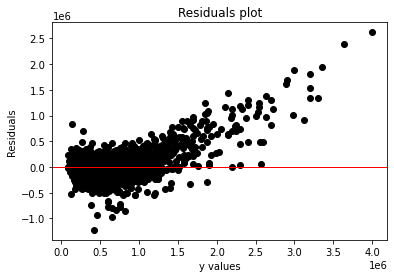

In [ ]:
# analyze residuals

residuals = np.subtract(y_test, y2_pred)

res = pd.DataFrame(residuals)
print(res.describe())

# plot residuals

plt.scatter(y_test, residuals, color='black')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.title('Residuals plot')
plt.xlabel('y values')
plt.ylabel('Residuals')
plt.show()

The points are distributed around the mean which is very close to zero. The distribution does not exhibit a definite pattern.

In [ ]:
# Heteroskedasticity test using Barlett's test

import scipy as sp

test_result, p_value = sp.stats.bartlett(y2_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y2_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


In [ ]:
# performing k_fold cross validation

X = df.drop(['price', 'sqft_above', 'sqft_living', 'bathrooms'], axis=1)
y = df['price']
from sklearn.model_selection import KFold
from sklearn import metrics

# perform k-fold using 10 folds
folds = KFold(n_splits=10)

# number of folds/splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# create and assess the 10 models based on the folds we created.

RMSES = [] 
count = 1

for train_index, test_index in folds.split(X,y):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold

  X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
  y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]
  
  # fit a model accordingly

  lin_reg = LinearRegression()

  # fit for X_train and y_train
  lin_reg.fit(X_train, y_train)

  # assess the accuraccy of the model

  y1_pred = linreg.predict(X_train)
  y2_pred = linreg.predict(X_test)

  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y2_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' --- Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 10 folds

Training model 1
Model 1 --- Root Mean Squared Error: 221742.1511430263

Training model 2
Model 2 --- Root Mean Squared Error: 237729.3532618332

Training model 3
Model 3 --- Root Mean Squared Error: 202469.68779298163

Training model 4
Model 4 --- Root Mean Squared Error: 245739.0004056383

Training model 5
Model 5 --- Root Mean Squared Error: 202636.43984816782

Training model 6
Model 6 --- Root Mean Squared Error: 199788.60773855768

Training model 7
Model 7 --- Root Mean Squared Error: 197002.6727380047

Training model 8
Model 8 --- Root Mean Squared Error: 204073.04185901617

Training model 9
Model 9 --- Root Mean Squared Error: 215884.88140347452

Training model 10
Model 10 --- Root Mean Squared Error: 229052.6239269883


The least rmse score for polynomial regression method is for model 6 ~ 199788.

Our baseline model has the least rmse of 199788 which will be our point of reference for all other models.

## ii.) Quantile Regression

In [ ]:
# split into dependent and independent variables

X = df.iloc[:,1:11]
y = df.iloc[:,0]


# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2, random_state=0)

import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y ~ X', df).fit(q=.5)
print(mod.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:             0.008637
Model:                       QuantReg   Bandwidth:                   5.036e+08
Method:                 Least Squares   Sparsity:                    6.738e+09
Date:                Sun, 24 Apr 2022   No. Observations:                21610
Time:                        22:17:19   Df Residuals:                    21599
                                        Df Model:                           10
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.044e+09   2.61e+08      7.829      0.000    1.53e+09    2.56e+09
X[0]        -305.6924     99.235     -3.080      0.002    -500.201    -111.184
X[1]        1.816e+08   3.17e+07      5.729      0.000    1.19e+08    2.44e+08
X[2]       -1.251e+08   5.04e+07     -2.484      0.0

For the median quantile regression line, the y_intercept is  2.044e+09. 


In [ ]:
# Finding the regression coefficients for 0.25 quantile
#
mod = smf.quantreg('y ~ X', df).fit(q=.25)
print(mod.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:             0.005068
Model:                       QuantReg   Bandwidth:                   4.382e+08
Method:                 Least Squares   Sparsity:                    7.641e+09
Date:                Sun, 24 Apr 2022   No. Observations:                21610
Time:                        22:15:42   Df Residuals:                    21599
                                        Df Model:                           10
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.251e+08   2.53e+08      0.888      0.374   -2.72e+08    7.22e+08
X[0]        -623.8580     94.365     -6.611      0.000    -808.820    -438.896
X[1]        7.085e+06   2.99e+07      0.237      0.813   -5.16e+07    6.57e+07
X[2]         3.47e+07   4.96e+07      0.699      0.4

For the .25 quantile regression line, the y_intercept is   2.251e+08. 

In [ ]:
# Finding the regression coefficients for 0.75 quantile
#
mod = smf.quantreg('y ~ X', df).fit(q=.75)
print(mod.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:              0.01594
Model:                       QuantReg   Bandwidth:                   4.382e+08
Method:                 Least Squares   Sparsity:                    8.661e+09
Date:                Sun, 24 Apr 2022   No. Observations:                21610
Time:                        22:15:52   Df Residuals:                    21599
                                        Df Model:                           10
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    6.82e+09   2.91e+08     23.427      0.000    6.25e+09    7.39e+09
X[0]        -715.1227    115.781     -6.177      0.000    -942.061    -488.184
X[1]       -3.325e+07   3.46e+07     -0.961      0.337   -1.01e+08    3.46e+07
X[2]        5.111e+07   5.49e+07      0.932      0.3

For the .75 quantile regression line, the y_intercept is  6.82e+09. 

## iii.) Ridge Regression

In [ ]:
# ridge regression with hyperparameter tuning

X = df.drop(['price'], axis=1)
y = df['price']


from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(0,2000, 30)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

search.fit(X,y)
abs(search.best_score_), search.best_params_ 

(50061791531.282, {'alpha': 1.0})

In [ ]:
# We can confirm this by fitting our model with the ridge information and finding
# the mean squared error below
#
ridge = Ridge(normalize=True,alpha=1.0)
ridge.fit(X,y)
y_pred=ridge.predict(X)
second_model = np.sqrt(mean_squared_error(y,y_pred))
print(second_model)

223360.07739138676


This ridge model does not perform better than our linear model since it has a higher root mean squared error.

In [ ]:
ridge.coef_

array([-8.73151748e-07,  2.36634724e+04,  1.63867875e-01,  4.67287680e+04,
        3.74721627e+05,  5.15539865e+04,  1.86913298e+04,  7.06077683e+04,
        7.60244805e+01, -5.08522341e+02,  3.87166359e+01, -1.04601728e+02,
        3.40816304e+05, -5.77521353e+04,  8.97108510e+01,  9.90493704e-02])

              price
count  2.161000e+04
mean   2.384634e-09
std    2.424125e+05
min   -8.661960e+05
25%   -1.190584e+05
50%   -4.345541e+04
75%    5.065908e+04
max    5.972894e+06


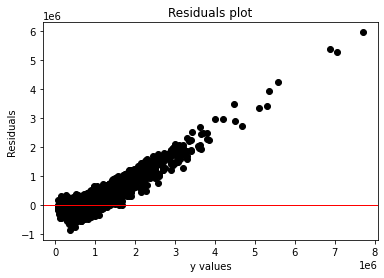

In [ ]:
# analyze residuals

residuals = np.subtract(y, y_pred)

res = pd.DataFrame(residuals)
print(res.describe())

# plot residuals

plt.scatter(y, residuals, color='black')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.title('Residuals plot')
plt.xlabel('y values')
plt.ylabel('Residuals')
plt.show()

Data points are also distributed around the mean which is close to zero. There is a linear pattern exhibited by data points distribution.

In [ ]:
# Heteroskedasticity test using Barlett's test

import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


## iv.) Lasso Regression

In [ ]:

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

lasso = Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 

# evaluate results

print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test)) 
print("lasso RMSE:", np.sqrt(mean_squared_error(y_test, gridlasso.predict(X_test))))
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)


lasso best parameters: {'alpha': 6.0}
lasso score: 0.7047439728457929
lasso MSE: 40152460491.72438
lasso best estimator coef: [-1.64876036e-06 -3.59955512e+04  3.80006616e+04  2.89209828e+02
  1.17656731e-01  8.35457614e+03  5.28829413e+05  5.56603241e+04
  2.51538591e+04  9.57725117e+04 -1.05216565e+02 -1.32914519e+02
 -2.59066278e+03  1.65816430e+01 -5.89406717e+02  6.08260470e+05
 -2.04951735e+05  1.71246262e+01 -3.97805686e-01]


In [ ]:
# Let's fit lasso regression 
lasso = Lasso(normalize=True,alpha=6.0)
lasso.fit(X,y)

# find rmse
second_model = np.sqrt(mean_squared_error(y_true=y,y_pred=lasso.predict(X)))
print(second_model)

201302.76825985394


The lasso model does not perform better than our linear model since it has a higher root mean squared error. It however performs better than the ridge model.

              price
count  2.161000e+04
mean   2.940928e-10
std    2.233652e+05
min   -8.805728e+05
25%   -1.122688e+05
50%   -3.214340e+04
75%    5.723044e+04
max    5.165938e+06


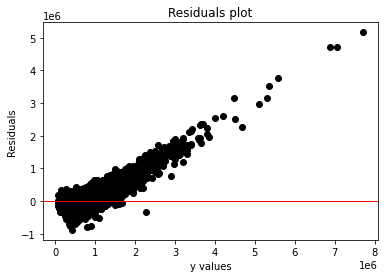

In [ ]:
# analyze residuals

residuals = np.subtract(y, y_pred)

res = pd.DataFrame(residuals)
print(res.describe())

# plot residuals

plt.scatter(y, residuals, color='black')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.title('Residuals plot')
plt.xlabel('y values')
plt.ylabel('Residuals')
plt.show()

The pattern exhibited by the datapoints here is similar to the pattern in ridge model. The mean is very close to zero and data points are concentrated at this point.

In [ ]:
# Heteroskedasticity test using Barlett's test

import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

22329.659084728497
the variances are homogeneous!


## v.) Elastic Net Regression

In [ ]:
from sklearn.linear_model import ElasticNet

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,10),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
search.fit(X,y)

abs(search.best_score_), search.best_params_

(41047954641.08117, {'alpha': 1e-05, 'l1_ratio': 0.8})

In [ ]:
elastic=ElasticNet(normalize=True,alpha= 1e-05,l1_ratio=0.8)
elastic.fit(X,y)
second_model=np.sqrt(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

201503.23297290766


This model similarly does not perform better than our linear regression model.

              price
count  2.161000e+04
mean   2.940928e-10
std    2.233652e+05
min   -8.805728e+05
25%   -1.122688e+05
50%   -3.214340e+04
75%    5.723044e+04
max    5.165938e+06


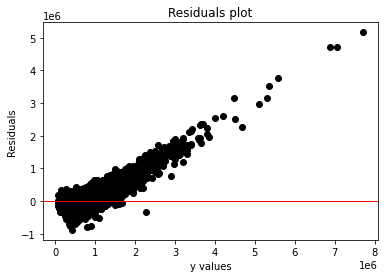

In [ ]:
# analyze residuals

residuals = np.subtract(y, y_pred)

res = pd.DataFrame(residuals)
print(res.describe())

# plot residuals

plt.scatter(y, residuals, color='black')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.title('Residuals plot')
plt.xlabel('y values')
plt.ylabel('Residuals')
plt.show()

The pattern resembles that of the lasso model and the ridge model.

In [ ]:
# Heteroskedasticity test using Barlett's test

import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

22329.659084728497
the variances are homogeneous!


## 8. Challenging the solution

The baseline model gives the best accuracy since it has the lowest rmse. 

Prices are known to be volatile with time periods. We expect that the prices will rise with time hence our predictions wont hold for very long. We xpect a rise because houses are known to appreciate with time.

Our research question was relevant since the dataset possess the capability to correctly our predict the variables.

## 9. Recommendations

Since our simple linear regression model is more accurate than the rest of the models, we need to consider steps to improve the model such as:

a. Dropping more columns that are correlated

b. Adding polynomial terms to model the nonlinear relationship between house attributes and their prices.

c. Adding spines to approximate piecewise linear models. 